## 流程
1.查看数据，包括数据列，数量，空值

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
%matplotlib inline
np.random.seed(2)
sns.set(style='white', context='notebook', palette='deep')

In [30]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
print(train_data.shape, test_data.shape)

(42000, 785) (28000, 784)


In [31]:
x_train_data = train_data.drop(labels=['label'], axis=1)
x_train_data.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train_data = train_data['label']
y_train_data.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [33]:
del train_data

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

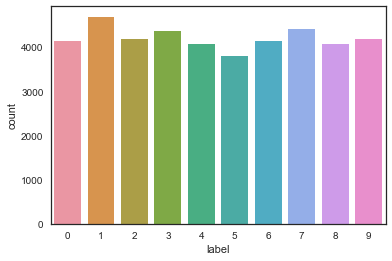

In [34]:
g = sns.countplot(y_train_data)
y_train_data.value_counts()

In [35]:
type(y_train_data.value_counts())

pandas.core.series.Series

In [36]:
(y_train_data.value_counts())[5]

3795

In [37]:
x_train_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [38]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [39]:
x_train_data = x_train_data / 255.0
test_data = test_data / 255.0

In [40]:
x_train_data = x_train_data.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

### one-hot code

In [41]:
y_train_data = to_categorical(y_train_data, num_classes=10)

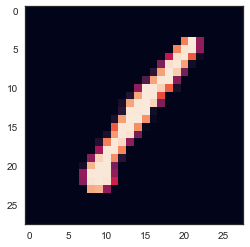

In [42]:
g = plt.imshow(x_train_data[0][:,:,0])

In [43]:
random_seed = 2
x_train, x_vali, y_train, y_vali = train_test_split(x_train_data, y_train_data,
                                                   test_size=0.1, random_state=random_seed)

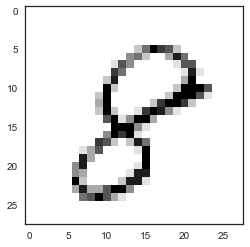

In [47]:
g = plt.imshow(x_train[0][:,:,0], cmap='gray_r')

In [48]:
print(x_train[0][:,:,0])

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

## Keras model

In [55]:
model = Sequential() # keras.model.Sequential()
# Conv2D *2 -> MaxPool -> Dropout
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv2d *2 ->MaxPool -> Dropout
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


优化器 RMSprop

In [56]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [58]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3,
                                           verbose=1, factor=0.5,
                                           min_lr=0.00001)
epochs=1
batch_size =86